In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np
torch.__version__

'1.2.0'

In [2]:
if torch.cuda.is_available and torch.has_cudnn:
    device = torch.device('cuda')
else:
    device = torch.device("cpu")

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data/snli_train.tsv",sep="\t")
df_v = pd.read_csv("data/snli_val.tsv",sep="\t")

In [5]:
df_v.describe()

,sentence1,sentence2,label
count,1000,1000,1000
unique,891,999,3
top,A skier is jumping in the air over a snowfield...,People are outside .,neutral
freq,2,2,338


In [6]:
df_v.head()

,sentence1,sentence2,label
0,"Three women on a stage , one wearing red shoes...",There are two women standing on the stage,contradiction
1,"Four people sit on a subway two read books , o...","Multiple people are on a subway together , wit...",entailment
2,bicycles stationed while a group of people soc...,People get together near a stand of bicycles .,entailment
3,Man in overalls with two horses .,a man in overalls with two horses,entailment
4,Man observes a wavelength given off by an elec...,The man is examining what wavelength is given ...,entailment


In [7]:
first = df["sentence1"].values#[0:5000]
second = df["sentence2"].values#[0:5000]
labels = df["label"].values#[0:5000]

first_v = df_v["sentence1"].values#[0:500]
second_v = df_v["sentence2"].values#[0:500]
labels_v = df_v["label"].values#[0:500]

In [8]:
print(first[-1],second[-1],labels[-1])

Two gentlemen in tuxes play the keyboard and guitar . The two guys are in a band . neutral


In [9]:
print(len(set(labels)))

3


In [10]:
import string
punctuations = string.punctuation

In [11]:
labels[:10]

array(['neutral', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment'], dtype=object)

In [12]:
label_to_idx = {
    'entailment':0,
    'contradiction':1,
    'neutral':2
}

for i in range(len(labels)):
    labels[i] = label_to_idx[labels[i]]
    
for i in range(len(labels_v)):
    labels_v[i] = label_to_idx[labels_v[i]]

In [13]:
labels = labels.astype("int32")
labels_v = labels_v.astype("int32")

In [14]:
def tokenize(sent):
  #tokens = tokenizer(sent)
  return [word.lower() for word in sent.split(" ") if (word not in punctuations)]

In [15]:
tokenize("helldoifjsdoihfs . numpy")

['helldoifjsdoihfs', 'numpy']

In [16]:
labels

array([2, 0, 2, ..., 2, 1, 2], dtype=int32)

In [17]:
def tokenize_dataset(dataset1,dataset2):
    token_dataset1 = []
    token_dataset2 = []
    all_tokens = []
    
    for sample in dataset1:
        tokens = tokenize(sample)
        token_dataset1.append(tokens)
        all_tokens += tokens
        
    for sample in dataset2:
        tokens = tokenize(sample)
        token_dataset2.append(tokens)
        all_tokens += tokens

    return token_dataset1,token_dataset2, all_tokens


In [18]:
torch.LongTensor(labels)
torch.LongTensor(labels_v)

tensor([1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
        1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0,
        2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2,
        0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1,
        1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2,
        1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0,
        1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0,

In [19]:
sent1_tokens,sent2_tokens,all_train_tokens = tokenize_dataset(first,second)
sent1_tokens_v,sent2_tokens_v,all_train_tokens_v = tokenize_dataset(first_v,second_v)

In [20]:
print(sent2_tokens[10])
print(all_train_tokens[0:10])
print(len(set(all_train_tokens)))

['the', 'dog', 'is', 'jumping', 'high']
['a', 'young', 'girl', 'in', 'a', 'pink', 'shirt', 'sitting', 'on', 'a']
21006


In [21]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)
token2id_v, id2token_v = build_vocab(all_train_tokens_v)

In [22]:
len(id2token_v)

2539

In [23]:
import random
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 220 ; token many
Token many; token id 220


In [24]:
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

sent1_indices = token2index_dataset(sent1_tokens)
sent2_indices = token2index_dataset(sent2_tokens)
sent1_indices_v = token2index_dataset(sent1_tokens_v)
sent2_indices_v = token2index_dataset(sent2_tokens_v)
#test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("sent1 dataset size is {}".format(len(sent1_indices)))
print ("sent2 dataset size is {}".format(len(sent2_indices)))
print ("Val dataset size is {}".format(len(sent1_indices_v)))
#print ("Test dataset size is {}".format(len(test_data_indices)))

sent1 dataset size is 100000
sent2 dataset size is 100000
Val dataset size is 1000


In [25]:
import random
rand_training_example = random.randint(0, len(first) - 1)
print (sent1_indices[rand_training_example])
print(sent1_tokens[rand_training_example])
print (sent2_indices[rand_training_example])
print(sent2_tokens[rand_training_example])
print(labels[rand_training_example])

[13, 94, 21, 4, 1469, 665, 1771, 2, 3543]
['two', 'working', 'men', 'in', 'neon', 'vests', 'tackle', 'a', 'problem']
[3, 13, 21, 9, 94]
['the', 'two', 'men', 'are', 'working']
0


In [26]:
max(max([len(s) for s in sent1_tokens]),max([len(s) for s in sent2_tokens]))

78

In [27]:
MAX_SENTENCE_LENGTH = 50


In [28]:
import numpy as np
import torch
from torch.utils.data import Dataset

class SNLIDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list1,data_list2, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list1 = data_list1
        self.data_list2 = data_list2
        self.target_list = target_list
        assert (len(self.data_list1) == len(self.data_list2) == len(self.target_list))

    def __len__(self):
        return len(self.data_list1)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx1 = self.data_list1[key][:MAX_SENTENCE_LENGTH]
        token_idx2 = self.data_list2[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx1,len(token_idx1),token_idx2,len(token_idx2),label]


In [29]:
train_dataset = SNLIDataset(sent1_indices,sent2_indices,labels)
val_dataset = SNLIDataset(sent1_indices_v,sent2_indices_v,labels_v)

In [30]:
#print(train_dataset[0])
s = val_dataset[99][0]
t = val_dataset[99][2]
#print(s)
print([id2token[i] for i in s])
print([id2token[i] for i in t])
print(val_dataset[99][-1])
#print([id2token[i] for i in range(len(train_dataset[0])])

['the', 'boy', 'wearing', 'the', 'blue', 'hooded', 'top', 'is', 'holding', 'a', 'baby', 'goat', 'in', 'his', 'arms']
['a', 'boy', 'ran', 'from', 'a', 'goat']
1


In [31]:
print("x {}{};\ny {}".format(train_dataset[99][0], train_dataset[99][2],train_dataset[99][-1]))

x [2, 22, 688, 184, 78, 2, 512, 10, 2329][80, 688, 204, 1516];
y 0


In [32]:
def SNLI_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list1 = []
    data_list2 = []
    label_list = []
    length_list1 = []
    length_list2 = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[-1])
        length_list1.append(datum[1])
    # padding
    for datum in batch:
        padded_vec1 = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list1.append(padded_vec1)
        
    for datum in batch:
        length_list2.append(datum[3])
    # padding
    for datum in batch:
        padded_vec2 = np.pad(np.array(datum[2]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[3])), 
                                mode="constant", constant_values=0)
        data_list2.append(padded_vec2)
    return [torch.from_numpy(np.array(data_list1)), torch.LongTensor(length_list1),torch.from_numpy(np.array(data_list2)), torch.LongTensor(length_list2), torch.LongTensor(label_list)]

In [33]:
BATCH_SIZE = 32

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=SNLI_collate_func,
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=SNLI_collate_func,
                                           shuffle=True)

In [34]:
for i, (data1, lengths1,data2, lengths2, labels) in enumerate(val_loader):
    print(data1.shape)
    #print(lengths1[1].item())
    ##print(data2[1])
    #print(lengths2[1].item())
    #print(labels[1].item())
    break

torch.Size([32, 50])


In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        #self.concat = 
        self.linear1 = nn.Linear(2*emb_dim,64)
        self.linear2 = nn.Linear(64,32)
        self.linear3 = nn.Linear(32,3)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self,data1,length1,data2,length2):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        # out1 out2?
        """
        out1 = self.embed(data1)
        out1 = torch.sum(out1, dim=1)
        out1 /= length1.view(length1.size()[0],1).expand_as(out1).float()
        
        out2 = self.embed(data2)
        out2 = torch.sum(out2, dim=1)
        out2 /= length2.view(length2.size()[0],1).expand_as(out2).float()
        
        out = torch.cat((out1,out2),dim=0)
        # return logits
        out = self.linear(out.float())
        return out
        """
        
        prem_embed = self.embed(data1) # 64xlen
        prem_embed = torch.sum(prem_embed, dim=1) #64
        prem_embed /= length1.view(length1.size()[0],1).expand_as(prem_embed).float()
        hypo_embed = self.embed(data2)
        hypo_embed = torch.sum(hypo_embed, dim=1)
        hypo_embed /= length2.view(length2.size()[0],1).expand_as(hypo_embed).float()
        
        out = torch.cat([prem_embed,hypo_embed],dim=1)
        out = self.linear1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.linear2(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.linear3(out.float())
        
        return out

In [36]:
emb_dim = 128
model = BagOfWords(len(id2token), emb_dim)

In [37]:
model.linear3.weight.shape

torch.Size([3, 32])

In [38]:
criterion = torch.nn.CrossEntropyLoss()  

learning_rate = 0.01
weight_decay = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=0)

In [39]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(model))

1298883


In [40]:
num_epochs = 3 # number epoch to train
val_acc_graph = []
train_loss_graph = []
# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    sample = []
    for data1, length1, data2, length2, labels in loader:
        data_batch1, length_batch1, data_batch2, length_batch2, label_batch = data1, length1, data2, length2, labels
        outputs = F.softmax(model(data_batch1, length_batch1,data_batch2,length_batch2), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        temp = predicted
        sample.append([temp,labels])
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total), sample

for epoch in range(num_epochs):
    for i, (data1, length1, data2, length2, labels) in enumerate(train_loader):
        model.train()
        data_batch1, length_batch1,data_batch2, length_batch2, label_batch = data1, length1, data2, length2, labels
        optimizer.zero_grad()
        outputs = model(data_batch1, length_batch1,data_batch2,length_batch2)
        loss = criterion(outputs, label_batch)
        #print(loss)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 50 == 0:
            #pass
            # validate
            val_acc = test_model(val_loader, model)[0]
            val_acc_graph.append(val_acc)
            train_loss_graph.append(loss.item())
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
               epoch+1, num_epochs, i+1, len(train_loader), val_acc))


Epoch: [1/3], Step: [51/3125], Validation Acc: 43.5
Epoch: [1/3], Step: [101/3125], Validation Acc: 44.6
Epoch: [1/3], Step: [151/3125], Validation Acc: 49.4
Epoch: [1/3], Step: [201/3125], Validation Acc: 51.6
Epoch: [1/3], Step: [251/3125], Validation Acc: 53.9
Epoch: [1/3], Step: [301/3125], Validation Acc: 52.3
Epoch: [1/3], Step: [351/3125], Validation Acc: 52.5
Epoch: [1/3], Step: [401/3125], Validation Acc: 54.6
Epoch: [1/3], Step: [451/3125], Validation Acc: 55.6
Epoch: [1/3], Step: [501/3125], Validation Acc: 57.0
Epoch: [1/3], Step: [551/3125], Validation Acc: 57.5
Epoch: [1/3], Step: [601/3125], Validation Acc: 56.7
Epoch: [1/3], Step: [651/3125], Validation Acc: 58.2
Epoch: [1/3], Step: [701/3125], Validation Acc: 59.9
Epoch: [1/3], Step: [751/3125], Validation Acc: 58.3
Epoch: [1/3], Step: [801/3125], Validation Acc: 58.2
Epoch: [1/3], Step: [851/3125], Validation Acc: 58.1
Epoch: [1/3], Step: [901/3125], Validation Acc: 57.7
Epoch: [1/3], Step: [951/3125], Validation Acc:

Epoch: [3/3], Step: [1501/3125], Validation Acc: 64.7
Epoch: [3/3], Step: [1551/3125], Validation Acc: 64.4
Epoch: [3/3], Step: [1601/3125], Validation Acc: 64.6
Epoch: [3/3], Step: [1651/3125], Validation Acc: 64.4
Epoch: [3/3], Step: [1701/3125], Validation Acc: 66.2
Epoch: [3/3], Step: [1751/3125], Validation Acc: 65.6
Epoch: [3/3], Step: [1801/3125], Validation Acc: 65.4
Epoch: [3/3], Step: [1851/3125], Validation Acc: 65.8
Epoch: [3/3], Step: [1901/3125], Validation Acc: 65.2
Epoch: [3/3], Step: [1951/3125], Validation Acc: 64.4
Epoch: [3/3], Step: [2001/3125], Validation Acc: 64.4
Epoch: [3/3], Step: [2051/3125], Validation Acc: 65.4
Epoch: [3/3], Step: [2101/3125], Validation Acc: 64.9
Epoch: [3/3], Step: [2151/3125], Validation Acc: 65.3
Epoch: [3/3], Step: [2201/3125], Validation Acc: 66.4
Epoch: [3/3], Step: [2251/3125], Validation Acc: 64.4
Epoch: [3/3], Step: [2301/3125], Validation Acc: 66.8
Epoch: [3/3], Step: [2351/3125], Validation Acc: 63.7
Epoch: [3/3], Step: [2401/31

In [41]:
print ("After training for {} epochs".format(num_epochs))
print ("Train Acc {}".format(test_model(train_loader, model)[0]))
print ("Val Acc {}".format(test_model(val_loader, model)[0]))
print("Number of parameters {}".format(count_parameters(model)))

After training for 3 epochs
Train Acc 74.497
Val Acc 64.8
Number of parameters 1298883


Text(0.5, 1.0, 'Training loss: DNN, concat, 10000 words, 128d')

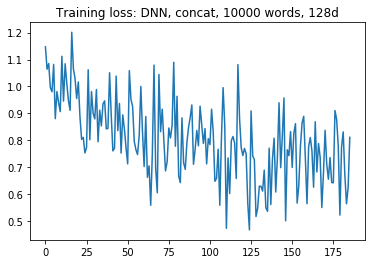

In [42]:
import matplotlib.pyplot as plt
x = np.arange(len(train_loss_graph))
plt.plot(x, train_loss_graph)
plt.title("Training loss: DNN, concat, 10000 words, 128d")

Text(0.5, 1.0, 'Validation accuracy: DNN, concat, 10000 words, 128d')

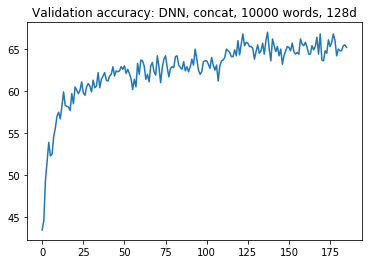

In [43]:
x = np.arange(len(val_acc_graph))
plt.plot(x, val_acc_graph)
plt.title("Validation accuracy: DNN, concat, 10000 words, 128d")

In [44]:
def saveList(myList,filename):
    # the filename should mention the extension 'npy'
    np.save(filename,myList)
    print("Saved successfully!")
train_loss_graph = np.asarray(train_loss_graph, dtype=np.float32)
val_acc_graph = np.asarray(val_acc_graph, dtype=np.float32)
saveList(train_loss_graph,"figures/DNN_train_concat_10000_128.npy")
saveList(val_acc_graph,"figures/DNN_val_concat_10000_128.npy")

Saved successfully!
Saved successfully!
